# Interface with Python, R, matlab



## Interfacing with Python

Two packages are available to call Python functions and objects from within Julia
- [PythonCall.jl](https://github.com/cjdoris/PythonCall.jl)
- [PyCall.jl](https://github.com/JuliaPy/PyCall.jl)



### What are the main differences?

| PythonCall                                                                                                                                                                    | PyCall                                                                                                                                                                  |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| PythonCall installs **dependencies into a separate Conda environment for each Julia project**. This means each Julia project can have an isolated set of Python dependencies. | Uses a **global Python installation**. User can still use a different version of Python than the default supports a wider range of conversions between Julia and Python |
| directly wraps the mutable object. This means that modifying the converted object modifies the original, and conversion is faster.                                            | copies mutable objects when converting                                                                                                                                  |
| PythonCall does not usually automatically convert results to Julia values, but leaves them as Python objects. **This means that indexing with Python starts with 0!**         | More seamless integration with Julia types, but may not be type-stable.                                                                                                 |
| supports Julia 1.6.1+ and Python 3.7+                                                                                                                                         | supports Julia 0.7+ and Python 2.7+                                                                                                                                     |





## PythonCall
It is a good idea to use `PythonCall` in combintation with `CondaPkg`
### Conda environment
Let's install `matplotlib` and `panda` in the Conda environment, and use it within Julia
```julia
julia> using CondaPkg

julia> # press ] to enter the Pkg REPL

pkg> conda add matplotlib panda
```
This creates a CondaPkg.toml file in the active project specifying the dependencies, just like a Project.toml specifies Julia dependencies. Commit this file along with the rest of the project so that dependencies are automatically installed for everyone using it.


### Getting started with `PythonCall`

Creating a numpy array



In [1]:
cd(@__DIR__)
using PythonCall
# importing Python modules
np = pyimport("numpy")
a = np.array([1,2,3])

    CondaPkg Found dependencies: /Users/victorboussange/Academia/Postdoc_S2z/teaching/iDiv_Julia_workshop/materials/Day2/21_interface/CondaPkg.toml
    CondaPkg Found dependencies: /Users/victorboussange/.julia/packages/PythonCall/flx5V/CondaPkg.toml
    CondaPkg Found dependencies: /Users/victorboussange/.julia/environments/v1.10/CondaPkg.toml
    CondaPkg Resolving changes
             + matplotlib
             + openssl
             + pandas
             + python
             + seaborn
             + xarray
    CondaPkg Creating environment
             │ /Users/victorboussange/.julia/artifacts/98aba21a6802e06a5d2e7c48633d7dc1c3d4a749/bin/micromamba
             │ -r /Users/victorboussange/.julia/scratchspaces/0b3b1443-0f03-428d-bdfb-f27f9c1191ea/root
             │ create
             │ -y
             │ -p /Users/victorboussange/Academia/Postdoc_S2z/teaching/iDiv_Julia_workshop/materials/Day2/21_interface/.CondaPkg/env
             │ --override-channels
             │ --no-channel


Transaction

  Prefix: /Users/victorboussange/Academia/Postdoc_S2z/teaching/iDiv_Julia_workshop/materials/Day2/21_interface/.CondaPkg/env

  Updating specs:

   - matplotlib=*
   - openssl[version='>=3, <3.1']
   - pandas=*
   - conda-forge::python[version='>=3.8,<4',build=*cpython*]
   - seaborn=*
   - xarray=*


  Package             Version  Build                 Channel           Size
─────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────

  + xz                  5.2.6  h57fd34a_0            conda-forge     Cached
  + python_abi           3.11  5_cp311               conda-forge        6kB
  + libcxx             18.1.8  h5a72898_4            conda-forge        1MB
  + bzip2               1.0.8  h99b78c6_7            conda-forge     Cached
  + libffi              3.4.2  h3422bc3_5            conda-forge     Cached
  + libzlib             1.3.1  hfb2fe0b_1            conda-

Python: array([1, 2, 3])


Here's an example of how you can use Pandas and Seaborn to visualize the iris dataset.


In [20]:
pd = pyimport("pandas")
sns = pyimport("seaborn")
using PythonPlot

# importing the dataset and putting 
# it in a nice DataFrame from the DataFrames.jl package
using CSV, DataFrames
iris_df = DataFrame(CSV.File("iris_data.csv"))

# converting the `DataFrame` into a Panda DataFrame
df_pd = pytable(iris_df)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,"[s, e, t, o, s, a]"
1,4.9,3.0,1.4,0.2,"[s, e, t, o, s, a]"
2,4.7,3.2,1.3,0.2,"[s, e, t, o, s, a]"
3,4.6,3.1,1.5,0.2,"[s, e, t, o, s, a]"
4,5.0,3.6,1.4,0.2,"[s, e, t, o, s, a]"
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,"[v, i, r, g, i, n, i, c, a]"
146,6.3,2.5,5.0,1.9,"[v, i, r, g, i, n, i, c, a]"
147,6.5,3.0,5.2,2.0,"[v, i, r, g, i, n, i, c, a]"
148,6.2,3.4,5.4,2.3,"[v, i, r, g, i, n, i, c, a]"


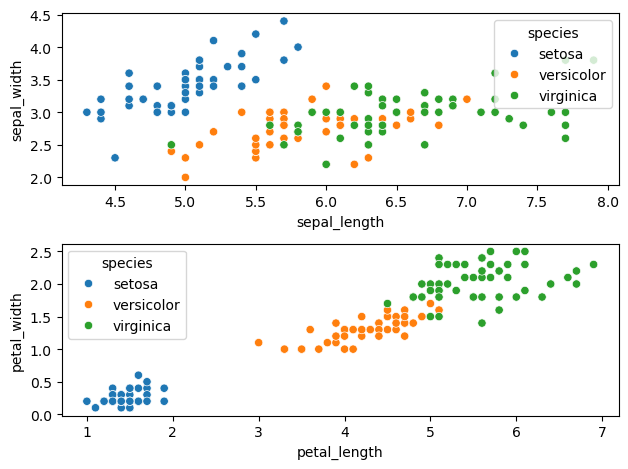

In [21]:

# Note the 0 indexing!
fig, axs = pyplot.subplots(2)
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df_pd, ax=axs[0])

sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=df_pd, ax=axs[1])
fig.tight_layout()
display(fig)




### Further references
Check [the very nice guide](https://cjdoris.github.io/PythonCall.jl/stable/pythoncall/) of PythonCall.



## Interfacing with R

With R, only one package for the interface:
- [RCall](https://github.com/JuliaInterop/RCall.jl)

In [12]:
using RCall


### Several Ways to use RCall

RCall provides multiple ways to allow R interacting with Julia. 

- R REPL mode with `$` sign
- `@rput` and `@rget` macros, together with `@rlibrary` and `@rimport`
- `R""` string macro
- RCall API: `reval`, `rcall`, `rcopy` and `robject` etc.

#### R REPL mode
The R REPL mode allows real time switching between the Julia prompt and R prompt. Press `$` to activate the R REPL mode and the R prompt will be shown. (Press `backspace` to leave R REPL mode in case you did not know.)

```r
julia> foo = 1
1

R> x <- $foo

R> x
[1] 1
```

The R REPL mode supports variable substitution of Julia objects via the `$` symbol. It is also possible to pass Julia expressions in the REPL mode.



#### `R""`

Another way to use RCall is the [`R""`](@ref) string macro, it is especially useful in script files.


In [13]:
R"rnorm(10)"

RObject{RealSxp}
 [1]  1.5411764  0.8323185 -1.4391764  1.9298555 -0.2152224 -0.7356581
 [7]  0.7259847 -0.2169447  0.9409981  0.1694967


This evaluates the expression inside the string in R, and returns the result as an `RObject`, which is a Julia wrapper type around an R object.



The `R""` string macro supports variable substitution of Julia objects via the `$` symbol, whenever it is not valid R syntax (i.e. when not directly following a symbol or completed expression such as `aa$bb`):

```julia
x = randn(10)
R"t.test($x)"
```

A large chunk of code could be quoted between triple string quotations


In [14]:
R"""install.packages("ggplot2", repos = "http://cran.us.r-project.org")"""

During startup - Warning messages:
1: Setting LC_CTYPE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
During startup - Warning messages:
1: Setting LC_CTYPE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
During startup - Warning messages:
1: Setting LC_CTYPE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
During startup - Warning messages:
1: Setting LC_CTYPE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


During startup - Warning messages:
1: Setting LC_CTYPE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
* installing *source* package 'ggplot2' ...
** package 'ggplot2' successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggplot2)
┌ Warning: RCall.jl: Installing package into '/opt/homebrew/lib/R/4.4/site-library'
│ (as 'lib' is unspecified)
│ trying URL 'http://cran.us.r-project.org/src/contrib/ggplot2_3.5.1.tar.gz'
│ Content type 'application/x-

RObject{NilSxp}
NULL


In [19]:
y = 1
R"""
f <- function(x, y) x + y
ret <- f(1, $y)
"""

R"""
library(ggplot2)
data(mtcars)
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()
"""

RObject{VecSxp}



#### `@rput` and `@rget` macros

These macros transfer variables between R and Julia environments. The copied variable will have the same name as the original.


In [7]:
z = 1
@rput z

1

In [8]:
R"z"

R"r = 2"

@rget r

2.0


## Interfacing with MATLAB

The [MATLAB.jl](https://github.com/juliamatlab/MATLAB.jl) package provides an interface for using MATLAB® from Julia. 



## Running External Programs
In Julia, you can run external programs using the `run` function. The `run` function takes a `Cmd` object that specifies the command to run and any arguments to pass to the command. 

The backtick characters are used to create a `Cmd` object.



### Run the "ls" command on a Unix-based system
```julia
run(`ls`)
```

You can also capture the output of an external command using the read() function. Here's an example of how to capture the output of the ls command:

```julia
output = read(`ls`, String)
println(output)
```



### Interpolation
Imagine that you want to rename a file called `myfile.csv`
```julia
filename = "myfile.csv"
newfilename = "myawesomefile.csv"
run(`mv $(filename) $(newfilename)`)
```



### Further resources
See [the Julia documentation](https://docs.julialang.org/en/v1/manual/running-external-programs/) for more details.